# EDA 

Exploratory Data Analysis - это первоначальный, разведочный процесс обработки данных, целью которого является:
1. Приведение данных в более удобный вид.
2. Понимание того, что из себя представляют данные.
3. Особенности представленных данных их структура.
4. Выявление ошибок, пропусков, выбросов в данных.

__Основная цель__ последующей обработки данных: анализ количества и видов преступлений и их зависимости от пола, возраста, времени для представления наглядной статистики о всех зафиксированных правонарушениях.


----


## Приведение данных в более удобных вид

Для начала необходимо подключить библиотеки с помощью которых будет осуществляться обработка данных.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

----
Данные представлены в формате .csv и находятся в одной директории с notebook.

In [3]:
path = "crime_data.csv"

try:
    df = pd.read_csv(path)
except Exception as e:
    print("Error occured while reading data.parquet:", e)
    raise

print("Size (rows, cols):", df.shape)

Size (rows, cols): (1004991, 28)


Количество столбцов *признаков* внутри наших данных 28, количество строк в данных равно 1004991.
На данный момент данные представлены внутри файла .csv где размещаются без четкой структуры через запятую.

Для того чтобы приводить данные в формат .parquet необходимо увидеть, что из себя представляют данные, путем вывода первых 10 строк данных.

In [4]:
display(df.head(5))

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


----
Далее необходимо вывести типы данных и визуально оценить, подходят ли эти типы для хранимых данных. Так-же названия столбцов __признаки__ стоит привести к другому стилю без пробела, например к **snake_case**

In [5]:
display(df.dtypes)

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [6]:
#df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')
rename_dict = {
    "DR NO": "DR_NO",
    "Date Rptd": "Date_Rptd",
    "DATE OCC": "DATE_OCC",
    "TIME OCC": "TIME_OCC",
    "AREA NAME": "AREA_NAME",
    "Rpt Dist No": "Rpt_Dist_No",
    "Part 1-2": "Part_1_2",
    "Crm Cd": "Crm_Cd",
    "Crm Cd Desc": "Crm_Cd_Desc",
    "Mocodes": "Mocodes",
    "Vict Age": "Vict_Age",
    "Vict Sex": "Vict_Sex",
    "Vict Descent": "Vict_Descent",
    "Premis Cd": "Premis_Cd",
    "Premis Desc": "Premis_Desc",
    "Weapon Used Cd": "Weapon_Used_Cd",
    "Weapon Desc": "Weapon_Desc",
    "Status": "Status",
    "Status Desc": "Status_Desc",
    "Crm Cd 1": "Crm_Cd_1",
    "Crm Cd 2": "Crm_Cd_2",
    "Crm Cd 3": "Crm_Cd_3",
    "Crm Cd 4": "Crm_Cd_4",
    "LOCATION": "LOCATION",
    "Cross Street": "Cross_Street",
    "LAT": "LAT",
    "LON": "LON"
}


df = df.rename(columns=rename_dict)
display(df.columns)

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA', 'AREA_NAME',
       'Rpt_Dist_No', 'Part_1_2', 'Crm_Cd', 'Crm_Cd_Desc', 'Mocodes',
       'Vict_Age', 'Vict_Sex', 'Vict_Descent', 'Premis_Cd', 'Premis_Desc',
       'Weapon_Used_Cd', 'Weapon_Desc', 'Status', 'Status_Desc', 'Crm_Cd_1',
       'Crm_Cd_2', 'Crm_Cd_3', 'Crm_Cd_4', 'LOCATION', 'Cross_Street', 'LAT',
       'LON'],
      dtype='object')

В таком виде с названиями столбцов будет легче работать. Далее по выводу dtypes и визуальному анализу данных, можно понять что признаки Crime_Cd должны быть в int, попробуем преобразовать. Для NaN значений выберем код __-1__.

In [7]:
cols_to_int = ["Crm_Cd_1", "Crm_Cd_2", "Crm_Cd_3", "Crm_Cd_4", "Premis_Cd", "Weapon_Used_Cd"]

# --- Change types ---
for col in cols_to_int:
    if col in df.columns:
        df[col] = df[col].fillna(-1).astype(int)



Продолжим приведение типов.

In [8]:
int_cols = ["DR_NO", "AREA", "Rpt_Dist_No", "Part_1_2", 
             "Vict_Age"]
for col in int_cols:
    if col in df.columns:
        df[col] = df[col].fillna(-1).astype(int)


date_cols = ['Date_Rptd', 'DATE_OCC']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")
    # Преобразуем обратно в строку с нужным форматом
    df[col] = df[col].dt.strftime("%m/%d/%Y %I:%M:%S %p")


geo_cols = ["LAT", "LON"]
for col in geo_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")


cat_cols = ["Vict_Sex", "Vict_Descent", "Status"]
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype("category")


str_cols = ["AREA_NAME", "Crm_Cd_Desc", "Mocodes", "Premis_Desc",
            "Weapon_Desc", "Status_Desc", "LOCATION", "Cross_Street"]
for col in str_cols:
    if col in df.columns:
        df[col] = df[col].astype("object")


print("\nТипы данных после приведения:")
print(df.dtypes)
display(df.head(4))


Типы данных после приведения:
DR_NO                int64
Date_Rptd           object
DATE_OCC            object
TIME_OCC             int64
AREA                 int64
AREA_NAME           object
Rpt_Dist_No          int64
Part_1_2             int64
Crm_Cd               int64
Crm_Cd_Desc         object
Mocodes             object
Vict_Age             int64
Vict_Sex          category
Vict_Descent      category
Premis_Cd            int64
Premis_Desc         object
Weapon_Used_Cd       int64
Weapon_Desc         object
Status            category
Status_Desc         object
Crm_Cd_1             int64
Crm_Cd_2             int64
Crm_Cd_3             int64
Crm_Cd_4             int64
LOCATION            object
Cross_Street        object
LAT                float64
LON                float64
dtype: object


,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Part_1_2,Crm_Cd,Crm_Cd_Desc,...,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LOCATION,Cross_Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354,-1,-1,-1,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230,-1,-1,-1,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354,-1,-1,-1,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331,-1,-1,-1,6000 COMEY AV,NaN,34.0339,-118.3747


Мы привели типы наших признаков к наиболее подходящим под их содержание. Далее можно попробовать удалить ненужные для нашей основной цели столбцы.
Следующие столбцы, по моему мнению, можно удалить  Crm_cd_1, Crm_cd_2, Crm_cd_3, Crm_cd_4 так как это дополнительные внутренние классификации которые зачастую пусты "NaN". Так-же можно удалить LAT и LON так ак эти данные не удобны для представляния, они удобны для создания карты, на данный момент такой цели нет

In [9]:

cols_to_drop = ["LAT", "LON", "Crm_Cd", "Crm_Cd_1", "Crm_Cd_2", "Crm_Cd_3", "Crm_Cd_4"]
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

print("Оставшиеся столбцы:")
print(df.columns)

Оставшиеся столбцы:
Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA', 'AREA_NAME',
       'Rpt_Dist_No', 'Part_1_2', 'Crm_Cd_Desc', 'Mocodes', 'Vict_Age',
       'Vict_Sex', 'Vict_Descent', 'Premis_Cd', 'Premis_Desc',
       'Weapon_Used_Cd', 'Weapon_Desc', 'Status', 'Status_Desc', 'LOCATION',
       'Cross_Street'],
      dtype='object')


Так-как количество данных очень большое, можно брать, например, только половину от всех данных. Чтобы оценить, есть ли ещё пропуски и если есть то в каком количестве. Эта информация поможет избавиться ещё от какого то набора данных. 

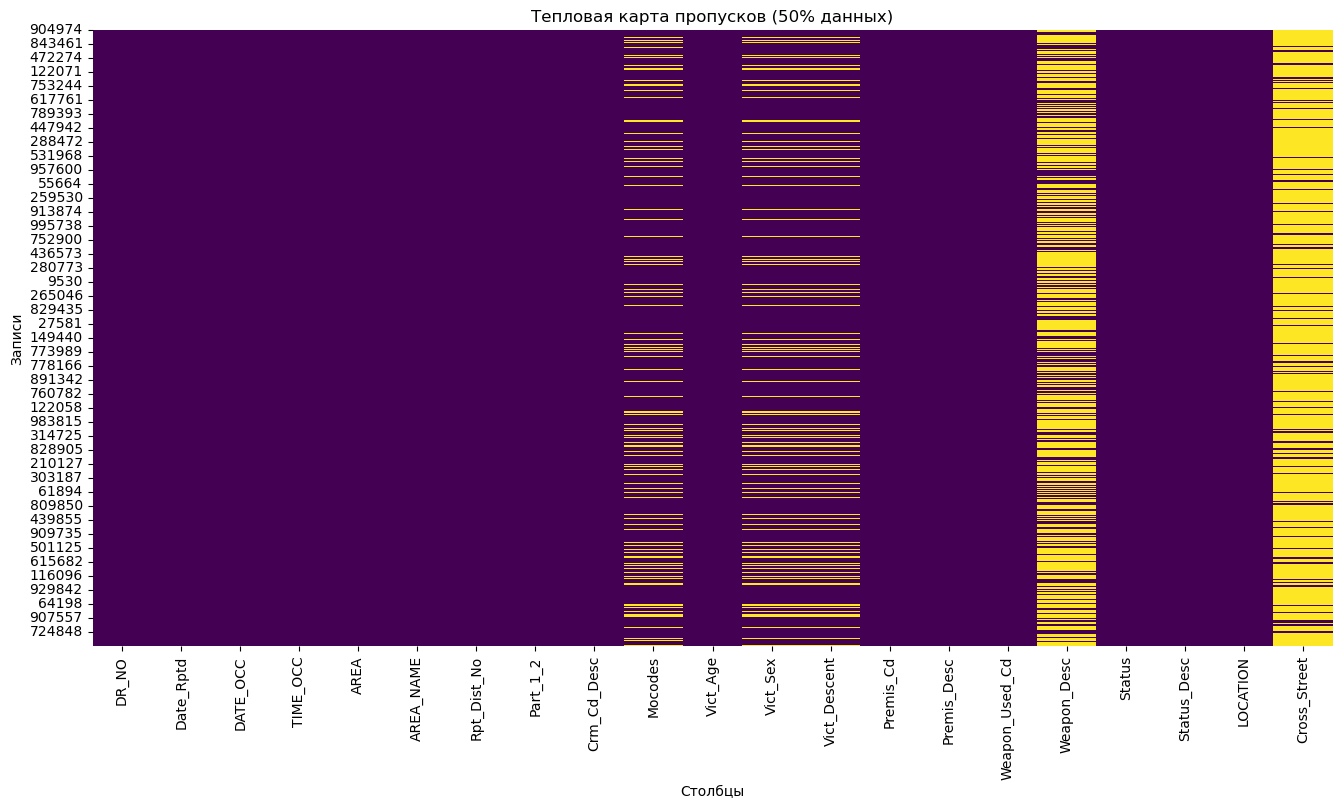

In [10]:
sample_df = df.sample(frac=0.5)


plt.figure(figsize=(16,8))
sns.heatmap(sample_df.isna(), cbar=False, cmap="viridis")
plt.title("Тепловая карта пропусков (50% данных)")
plt.xlabel("Столбцы")
plt.ylabel("Записи")
plt.show()


На тепловой карте видно, что очень большое количество записей без Cross_Street этот признак показывает прилежащие к месту преступления улицы. Удаление данного столбца не повлияет на качество решения __основной задачи__. Для того чтобы соблюсти критерий полноты необходимо удалить столбец Weapon_Desc тк он содержит много пустых значений и не повлияет на основную цель. Столбец Mocodes также является служебным номером, можно его удалить. Пол будет проанализирован ниже.


In [11]:
cols_to_drop = ["Cross_Street", "Weapon_Desc", "Mocodes"]
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

Посчитаем долю пропусков в процентах:

In [13]:

missing_values = df.isna().sum()


missing_percent = (missing_values / len(df)) * 100


missing_df = pd.DataFrame({
    'Пропусков (NaN)': missing_values,
    'Процент (%)': missing_percent.round(2)
}).sort_values(by='Процент (%)', ascending=False)

print("📊 Пропуски в данных:")
display(missing_df)

📊 Пропуски в данных:


,Пропусков (NaN),Процент (%)
Vict_Sex,144644,14.39
Vict_Descent,144656,14.39
Premis_Desc,588,0.06
DR_NO,0,0.00
Date_Rptd,0,0.00
DATE_OCC,0,0.00
Rpt_Dist_No,0,0.00
TIME_OCC,0,0.00
AREA,0,0.00
AREA_NAME,0,0.00


Количество пропусков по полу слишком большое, но этот параметр является очень важным для нашей задачи. Поэтому его удалить просто так нельзя, ниже будет произведен анализ почему пол иногда не заполняется.

### Проверка уникальности данных

Уникальность записи будет определяться уникальностью ключа DR_NO

In [12]:
unique_count = df["DR_NO"].nunique()
total_count = len(df)

print(f"Всего записей: {total_count}")
print(f"Уникальных DR_NO: {unique_count}")
print(f"Дубликатов: {total_count - unique_count}")

Всего записей: 1004991
Уникальных DR_NO: 1004991
Дубликатов: 0


Все записи являются уникальными, дубликатов нет.

## Анализ данных

В этом разделе мы проанализируем различные выборки, например: распределение количества жертв в зависимости от пола, возраста, района и тд.


----

### Анализ по возрасту

Проанализируем возраст на наличие аномалий, например когда возраст выше чем 105 лет или ниже 0.

In [16]:
anomalies = df[(df["Vict_Age"] < 0) | (df["Vict_Age"] > 105)]

print("Количество аномальных записей:", len(anomalies))
print(anomalies[["DR_NO", "Vict_Age", "Vict_Sex", "Crm_Cd_Desc"]])

Количество аномальных записей: 138
            DR_NO  Vict_Age Vict_Sex  \
3119    240106626        -4        X   
3252    242104815        -3        M   
6648    231806653        -2        X   
11920   240608551        -3        X   
12454   230610629        -2        X   
...           ...       ...      ...   
681763  242106068        -1        F   
729264  240706252        -1        X   
755160  240708202        -1        X   
819055  251704104        -1        X   
829485  241010723        -1        M   

                                              Crm_Cd_Desc  
3119                                   BUNCO, GRAND THEFT  
3252             SHOPLIFTING - PETTY THEFT ($950 & UNDER)  
6648                            OTHER MISCELLANEOUS CRIME  
11920                                   THEFT OF IDENTITY  
12454                                            BURGLARY  
...                                                   ...  
681763                  INTIMATE PARTNER - SIMPLE ASSAULT  
7292

Эти записи можно удалить тк, объем данных достаточно большой чтобы можно было убирать бракованные данные. Можно попробовать вывести график распределения возраста жертв.

Text(0, 0.5, 'Количество случаев')

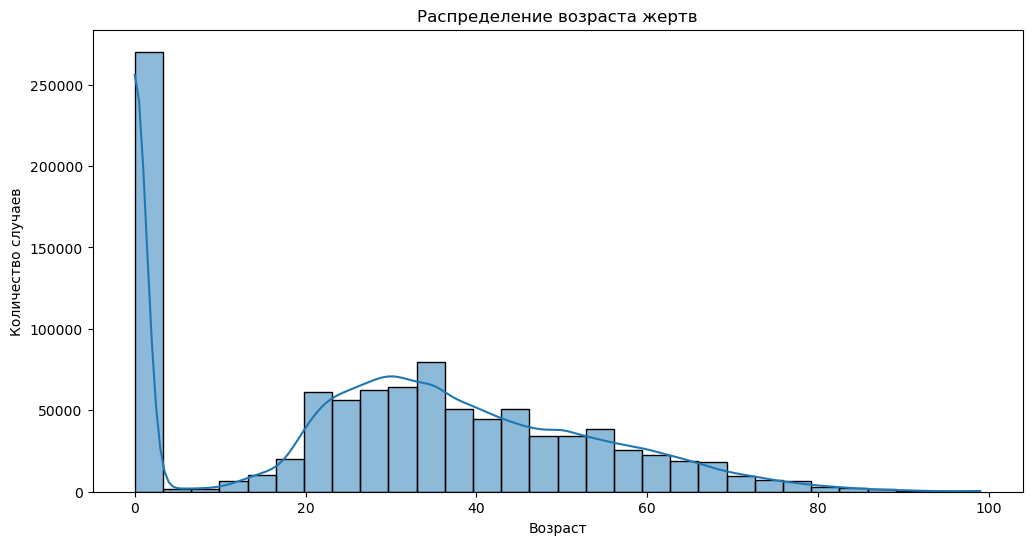

In [29]:
df = df[(df["Vict_Age"] >= 0) | (df["Vict_Age"] < 105)]
plt.figure(figsize=(12,6))
sns.histplot(df["Vict_Age"], bins=30, kde=True)
plt.title("Распределение возраста жертв")
plt.xlabel("Возраст")
plt.ylabel("Количество случаев")

На графике видно аномальный всплеск при возрасте равном нулю. Далее можно попробовать проанализировать, что это за преступления. Есть вероятность, что это преступления где человек напрямую(физически) не пострадал, например, кража и прочее. 

In [21]:
zero_age_df = df[df["Vict_Age"] == 0]

print(f"Количество записей с Vict_Age = 0: {len(zero_age_df)}\n")


crime_counts = zero_age_df["Crm_Cd_Desc"].value_counts()
print("Преступления для Vict_Age = 0:")
print(crime_counts)



Количество записей с Vict_Age = 0: 269222

Преступления для Vict_Age = 0:
Crm_Cd_Desc
VEHICLE - STOLEN                                           114843
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             25029
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                    21508
BURGLARY                                                    18101
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     14714
                                                            ...  
BIKE - ATTEMPTED STOLEN                                         1
RAPE, ATTEMPTED                                                 1
TELEPHONE PROPERTY - DAMAGE                                     1
CONTRIBUTING                                                    1
PURSE SNATCHING - ATTEMPT                                       1
Name: count, Length: 134, dtype: int64


Из вывода видно, что наибольшее количество преступлений это именно кража транспортного средства, разбой и вандализм. Построим график распредления 30 наиболее частых видов преступлений.

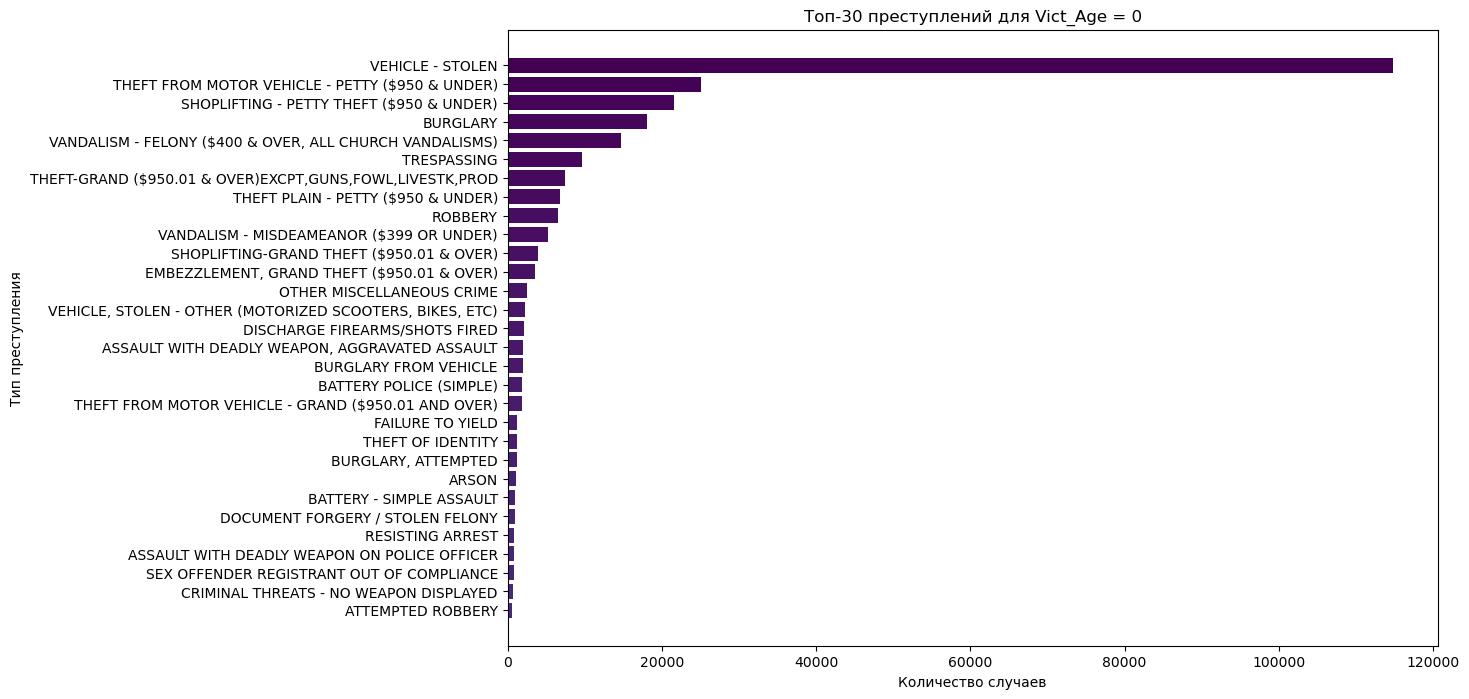

In [25]:
top_crimes = crime_counts.head(30)

plt.figure(figsize=(12,8))
plt.barh(top_crimes.index, top_crimes.values, color=plt.cm.viridis(range(len(top_crimes))))
plt.title("Топ-30 преступлений для Vict_Age = 0")
plt.xlabel("Количество случаев")
plt.ylabel("Тип преступления")
plt.gca().invert_yaxis()  # Чтобы самые частые шли сверху
plt.show()

----

### Анализ по полу

Следующим этапом попробуем определить данные с нарушенной целостностью по полу, также попробуем определить характер выбросов по этому признаку.



In [30]:
sex_counts = df['Vict_Sex'].value_counts()

print("Количество преступлений по полу жертв:")
print(sex_counts)

Количество преступлений по полу жертв:
Vict_Sex
M    403853
F    358568
X     97674
H       114
-         1
Name: count, dtype: int64


По выводу можно сделать вывод, что чаще всего жерствами преступлений являются мужчины чем женщины. Два оставшихся значения необходимо проанализировать.

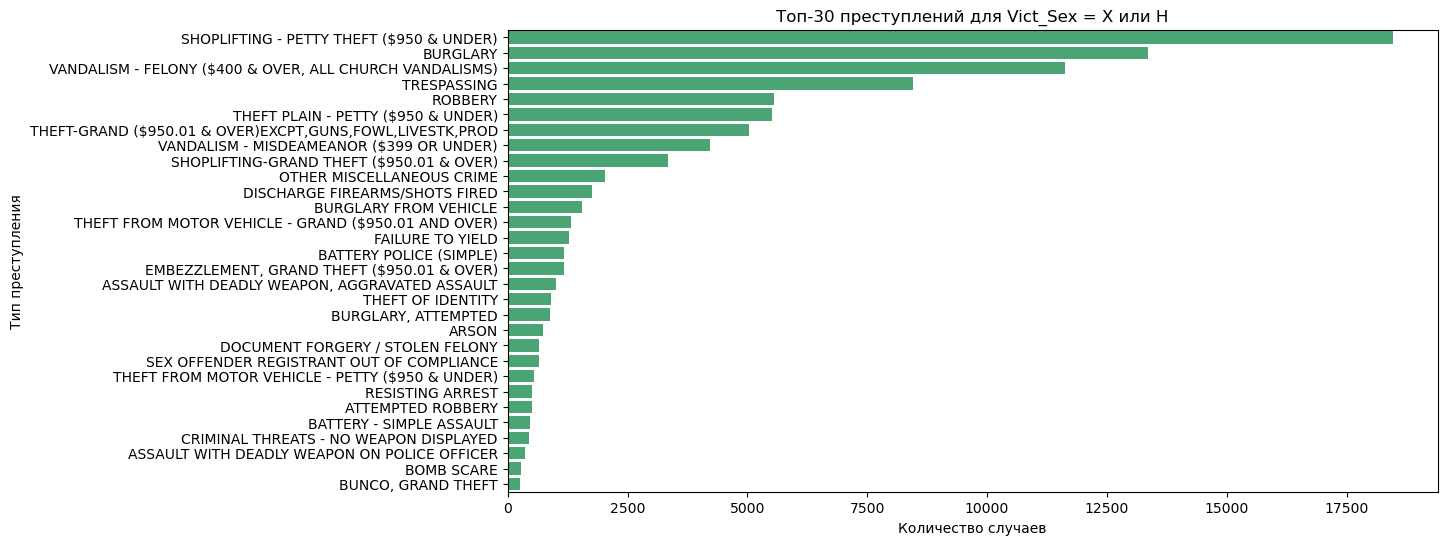

In [32]:
subset = df[df['Vict_Sex'].isin(['X', 'H'])]


crime_counts = subset['Crm_Cd_Desc'].value_counts().head(30)  # первые 30 популярных преступлений


plt.figure(figsize=(12,6))
sns.barplot(x=crime_counts.values, y=crime_counts.index, color="mediumseagreen")  # вместо palette используем color
plt.title("Топ-30 преступлений для Vict_Sex = X или H")
plt.xlabel("Количество случаев")
plt.ylabel("Тип преступления")
plt.show()

Значения X и H так-же, в основном, связаны с правонарушениями которые были совершены без прямого физического вреда жертве. 

Следующим шагом можно посчитать распределение преступлений в зависимости от мужского и женского пола. Возьмем топ 20 значений.

In [39]:
df_mf = df[df['Vict_Sex'].isin(['M', 'F'])]
# Явно указываем observed=False, чтобы сохранить текущее поведение
crime_by_sex = df_mf.groupby(['Vict_Sex', 'Crm_Cd_Desc'], observed=False).size().unstack(fill_value=0)



top_crimes_m = crime_by_sex.loc['M'].sort_values(ascending=False).head(20)
top_crimes_f = crime_by_sex.loc['F'].sort_values(ascending=False).head(20)

print("Топ-10 преступлений для мужчин:")
print(top_crimes_m)

print("\nТоп-10 преступлений для женщин:")
print(top_crimes_f)

Топ-10 преступлений для мужчин:
Crm_Cd_Desc
BATTERY - SIMPLE ASSAULT                                    39222
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              38173
BURGLARY FROM VEHICLE                                       35400
BURGLARY                                                    28579
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     28026
THEFT OF IDENTITY                                           25812
THEFT PLAIN - PETTY ($950 & UNDER)                          24860
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         21653
ROBBERY                                                     19142
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    16808
INTIMATE PARTNER - SIMPLE ASSAULT                           11108
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    10959
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                    10867
BRANDISH WEAPON                                              9572
THEFT FROM MOTOR VEHICLE - PETTY

Следующим шагом можно построить графики распределений в зависимости от пола. 

Text(0, 0.5, 'Тип преступления')

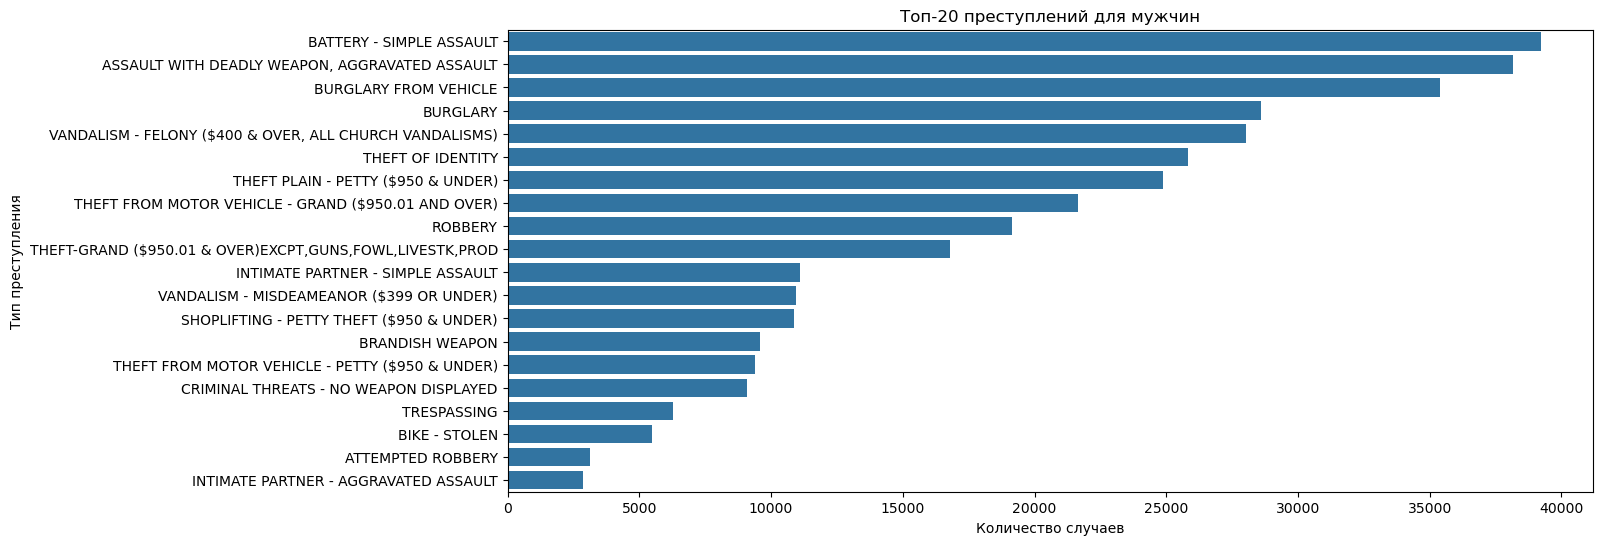

In [43]:

plt.figure(figsize=(14,6))

sns.barplot(x=top_crimes_m.values, y=top_crimes_m.index) 
plt.title("Топ-20 преступлений для мужчин")
plt.xlabel("Количество случаев")
plt.ylabel("Тип преступления")




Text(0, 0.5, 'Тип преступления')

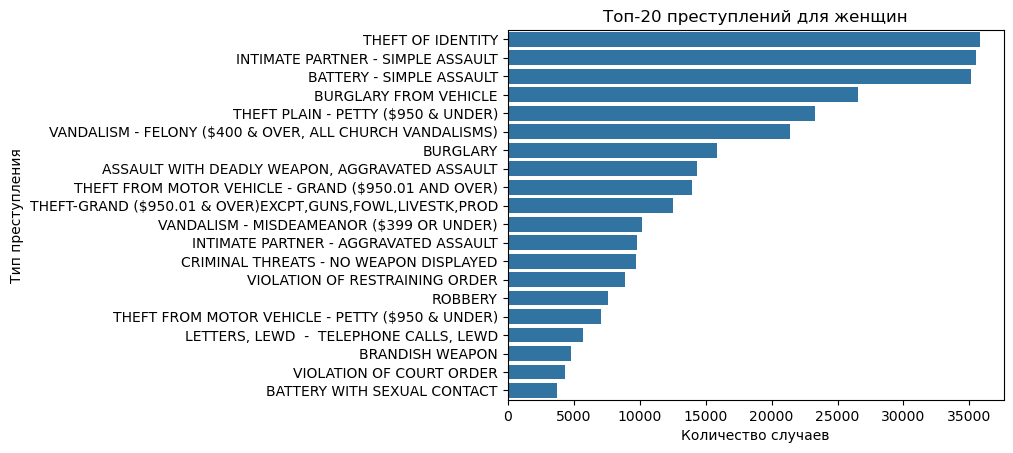

In [44]:
sns.barplot(x=top_crimes_f.values, y=top_crimes_f.index) 
plt.title("Топ-20 преступлений для женщин")
plt.xlabel("Количество случаев")
plt.ylabel("Тип преступления")

Из графиков можно сделать вывод, что мужчины чаще становятся жертвами вооруженных нападений. А женщины чаще становятся жертвами домашнего насилия.

### Анализ распределения преступлений по дате



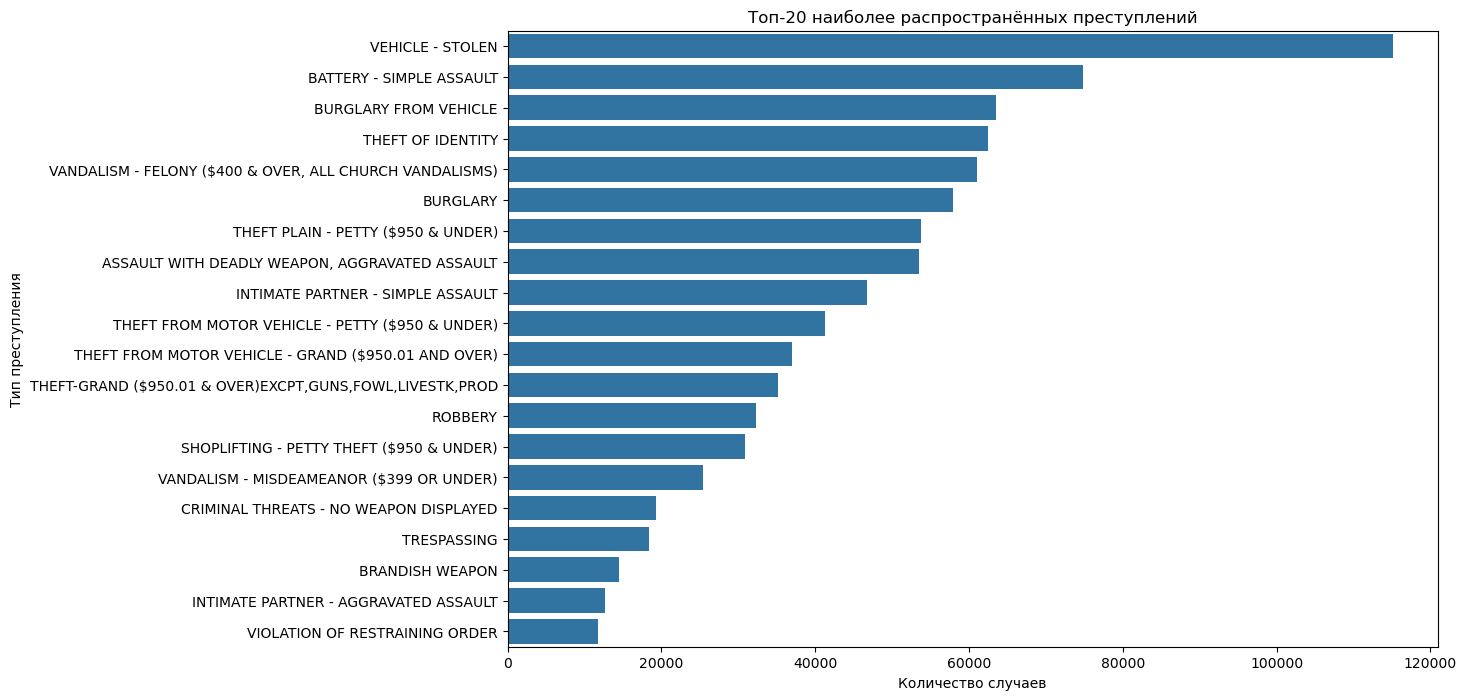

In [45]:

crime_counts = df['Crm_Cd_Desc'].value_counts()

top_20_crimes = crime_counts.head(20)

plt.figure(figsize=(12,8))
sns.barplot(x=top_20_crimes.values, y=top_20_crimes.index)
plt.title("Топ-20 наиболее распространённых преступлений")
plt.xlabel("Количество случаев")
plt.ylabel("Тип преступления")
plt.show()

Из анализа графика распределения наиболее частых претуслпений, можно сделать вывод, что чаще всего совершаются кражи и нападения с побоями.

### Анализ распредления по датам

Проанализируем состояние данных в DATE_OCC и Date_Rptd.

In [56]:



print("Минимальная дата совершения преступления:", df['DATE_OCC'].min())
print("Максимальная дата совершения преступления:", df['DATE_OCC'].max())

print("Минимальная дата регистрации преступления:", df['Date_Rptd'].min())
print("Максимальная дата регистрации преступления:", df['Date_Rptd'].max())


print("Ошибки преобразования (NaT) в DATE_OCC:", df['DATE_OCC'].isna().sum())
print("Ошибки преобразования (NaT) в Date_Rptd:", df['Date_Rptd'].isna().sum())

Минимальная дата совершения преступления: 2020-01-01 00:00:00
Максимальная дата совершения преступления: 2025-05-29 00:00:00
Минимальная дата регистрации преступления: 01/01/2020 12:00:00 AM
Максимальная дата регистрации преступления: 12/31/2024 12:00:00 AM
Ошибки преобразования (NaT) в DATE_OCC: 0
Ошибки преобразования (NaT) в Date_Rptd: 0


Из вывода можно сделать вывод, что строк с нарушенными датами в данных нет. Можно построить распределение случаев в зависимости от даты.

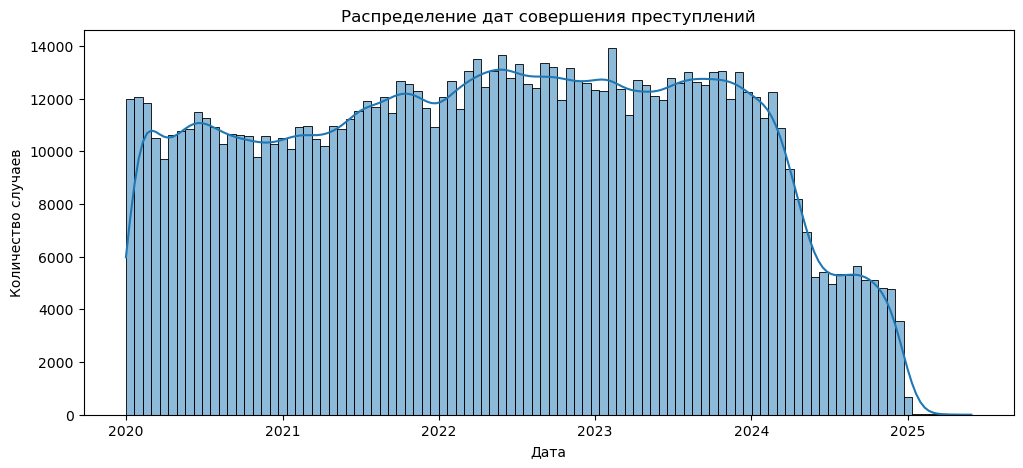

In [51]:
plt.figure(figsize=(12, 5))
sns.histplot(df['DATE_OCC'].dropna(), bins=100, kde=True)
plt.title("Распределение дат совершения преступлений")
plt.xlabel("Дата")
plt.ylabel("Количество случаев")
plt.show()

На графике видно, что аномальных значений нет. В 2025 году преступлений меньше тк дата самого позднего зафиксированного преступления в датасете это 29 мая, то есть не учтена примерно половина года, и значения на графике примерно в два раза меньше других.

### Анализ распредления по времени

В этом разделе мы попробуем обнаружить аномалии в распределении времени, когда было совершено преустпление.

In [52]:
invalid_times = df[(df["TIME_OCC"] < 0) | (df["TIME_OCC"] > 2359)]

print("Количество выбросов:", len(invalid_times))
display(invalid_times.head())

Количество выбросов: 0


,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Part_1_2,Crm_Cd_Desc,Mocodes,...,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon_Desc,Status,Status_Desc,LOCATION,DATE_RPTD


Количество выбросов, где время бы лежало в неверном диапазоне равно нулю. Можем составить график соврешенных преступлений в разное время. Отталкиваться будем от часов, при этом минуты опустим.

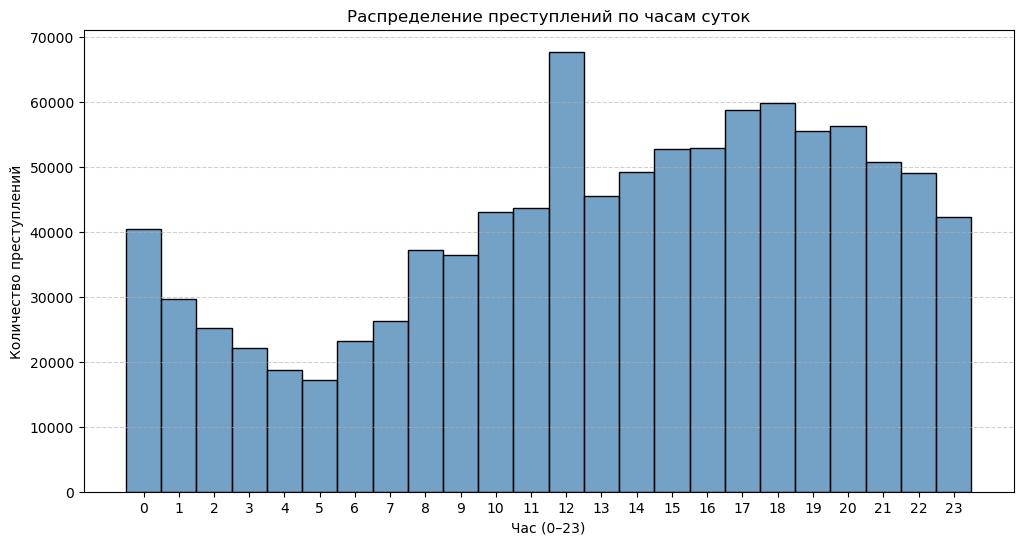

In [54]:
plt.figure(figsize=(12, 6))


sns.histplot((df["TIME_OCC"] // 100).astype(int), bins=24, discrete=True, color="steelblue")

plt.title("Распределение преступлений по часам суток")
plt.xlabel("Час (0–23)")
plt.ylabel("Количество преступлений")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

Распределение выглядит нормальным, есть выделяющееся значения на 12 часах. Есть вероятность, что если точное или примерное время совершения преступления неизвестно, то ставится значение по умолчанию 12 часов.

In [58]:
df_12 = df[(df["TIME_OCC"] // 100) == 12]
print(f"Количество записей с TIME_OCC около 12: {len(df_12)}")
df_12.head(5)

Количество записей с TIME_OCC около 12: 67790


,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Part_1_2,Crm_Cd_Desc,Mocodes,...,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon_Desc,Status,Status_Desc,LOCATION,DATE_RPTD
2,240913563,12/10/2024 12:00:00 AM,2020-10-30,1240,9,Van Nuys,933,2,THEFT OF IDENTITY,0377,...,M,W,501,SINGLE FAMILY DWELLING,-1,NaN,IC,Invest Cont,14600 SYLVAN ST,2024-12-10
5,240412063,12/11/2024 12:00:00 AM,2020-11-11,1210,4,Hollenbeck,429,2,THEFT OF IDENTITY,0100,...,M,B,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",-1,NaN,IC,Invest Cont,5300 CRONUS ST,2024-12-11
8,241708596,04/20/2024 12:00:00 AM,2020-03-02,1200,17,Devonshire,1729,2,THEFT OF IDENTITY,1501,...,M,W,501,SINGLE FAMILY DWELLING,-1,NaN,IC,Invest Cont,17700 SIMONDS ST,2024-04-20
23,201715737,11/25/2020 12:00:00 AM,2020-11-25,1200,17,Devonshire,1777,1,BURGLARY,0344 1202 0352,...,F,W,501,SINGLE FAMILY DWELLING,-1,NaN,IC,Invest Cont,9700 VALJEAN AV,2020-11-25
39,201416348,08/30/2020 12:00:00 AM,2020-08-28,1200,14,Pacific,1453,1,VEHICLE - STOLEN,NaN,...,NaN,NaN,108,PARKING LOT,-1,NaN,IC,Invest Cont,4000 GLENCOE AV,2020-08-30


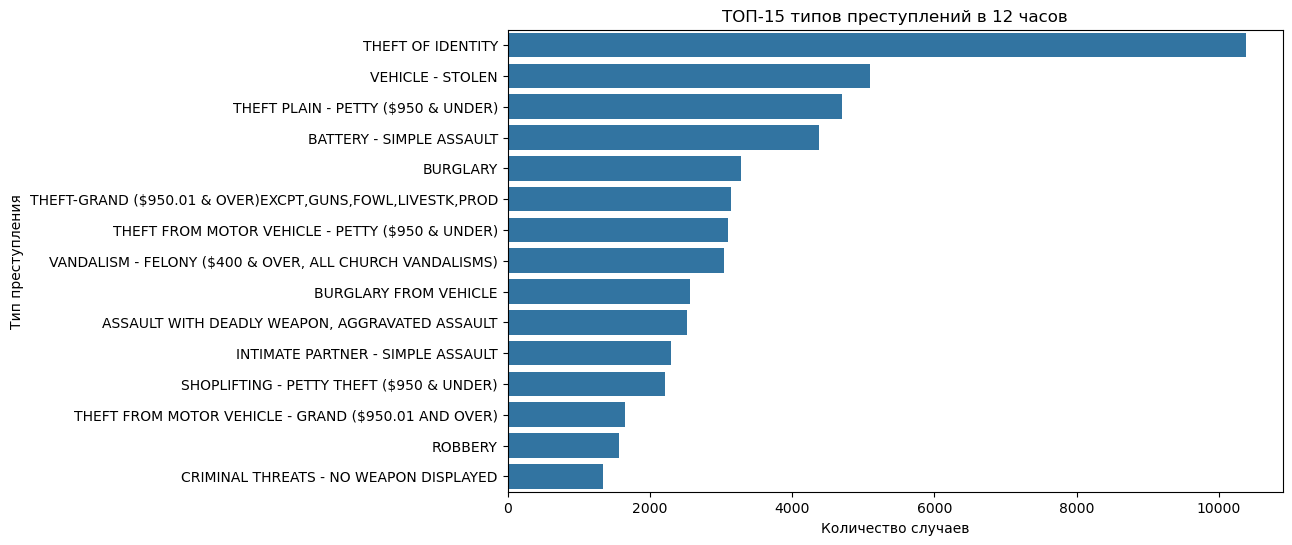

In [60]:
top_crimes_12 = (
    df_12["Crm_Cd_Desc"]
    .value_counts()
    .head(15)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_crimes_12.values, y=top_crimes_12.index)
plt.title("ТОП-15 типов преступлений в 12 часов")
plt.xlabel("Количество случаев")
plt.ylabel("Тип преступления")
plt.show()

Theft of identity(кража личных данных) преступление при котором очень сложно определлить, когда именно было совершено преступление, поэтому теория о времени по умолчанию, косвенно подтверждена. Параметр можно оставить таким, это не повлияет на текущие цели оценки.

### Вывод

1. Данные были приведены к более правильной форме и далее могут быть сохранены в более удобном формате.
2. Из датасета были убраны столбцы, чьи значения в основном пустые и не отвечают нынешним целям анализа.
3. Были проведены исселдования выбросов по различным значениям, были так-же представлены гипотезы возникновения некторых выбросов, выбросы неимеющие смысла были удалены.
4. Были построены различные распределения значений.